In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys 
from collections import defaultdict
from tqdm.notebook import tqdm
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, summer
from matplotlib.colorbar import ColorbarBase
import seaborn as sns
from math import floor, ceil

In [2]:
sys.path.append('..')
import dineof._utils as utils

In [3]:
sns.set(style="ticks", palette="pastel", rc={'figure.figsize':(18,12)})

In [4]:
# Load mask
mask = np.load('../test/2019/Input/static_grid/mask.npy').astype(bool)

In [5]:
summer_days = np.arange(151, 244)
satellites = ['aqua', 'terra', 'seawifs']
years = ['2003', '2004', '2005', '2006']
year_day_extender = {
    '2003': 0,
    '2004': 93,
    '2005': 93 * 2,
    '2006': 93 * 3
}
satellite_tensors = {
    'aqua': {
        '2003': {
            'data': np.load('Input/aqua/2003.npy'),
            'timeline': np.load('Input/aqua/2003_timeline.npy')
        },
        '2004': {
            'data': np.load('Input/aqua/2004.npy'),
            'timeline': np.load('Input/aqua/2004_timeline.npy')
        },
        '2005': {
            'data': np.load('Input/aqua/2005.npy'),
            'timeline': np.load('Input/aqua/2005_timeline.npy')
        },
        '2006': {
            'data': np.load('Input/aqua/2006.npy'),
            'timeline': np.load('Input/aqua/2006_timeline.npy')
        }
    },
    'terra': {
        '2003': {
            'data': np.load('Input/terra/2003.npy'),
            'timeline': np.load('Input/terra/2003_timeline.npy')
        },
        '2004': {
            'data': np.load('Input/terra/2004.npy'),
            'timeline': np.load('Input/terra/2004_timeline.npy')
        },
        '2005': {
            'data': np.load('Input/terra/2005.npy'),
            'timeline': np.load('Input/terra/2005_timeline.npy')
        },
        '2006': {
            'data': np.load('Input/terra/2006.npy'),
            'timeline': np.load('Input/terra/2006_timeline.npy')
        }
    },
    'seawifs': {
        '2003': {
            'data': np.load('Input/seawifs/2003.npy'),
            'timeline': np.load('Input/seawifs/2003_timeline.npy')
        },
        '2004': {
            'data': np.load('Input/seawifs/2004.npy'),
            'timeline': np.load('Input/seawifs/2004_timeline.npy')
        },
        '2005': {
            'data': np.load('Input/seawifs/2005.npy'),
            'timeline': np.load('Input/seawifs/2005_timeline.npy')
        },
        '2006': {
            'data': np.load('Input/seawifs/2006.npy'),
            'timeline': np.load('Input/seawifs/2006_timeline.npy')
        }
    }
}

In [48]:
# Print chlor means

chlor_mean_df = pd.DataFrame(
    [
        [
            satellite_tensors['aqua']['2003']['data'][~np.isnan(satellite_tensors['aqua']['2003']['data'])].mean(),
            satellite_tensors['terra']['2003']['data'][~np.isnan(satellite_tensors['terra']['2003']['data'])].mean(),
            satellite_tensors['seawifs']['2003']['data'][~np.isnan(satellite_tensors['seawifs']['2003']['data'])].mean()
        ],
        [
            satellite_tensors['aqua']['2004']['data'][~np.isnan(satellite_tensors['aqua']['2004']['data'])].mean(),
            satellite_tensors['terra']['2004']['data'][~np.isnan(satellite_tensors['terra']['2004']['data'])].mean(),
            satellite_tensors['seawifs']['2004']['data'][~np.isnan(satellite_tensors['seawifs']['2004']['data'])].mean()
        ],
        [
            satellite_tensors['aqua']['2005']['data'][~np.isnan(satellite_tensors['aqua']['2005']['data'])].mean(),
            satellite_tensors['terra']['2005']['data'][~np.isnan(satellite_tensors['terra']['2005']['data'])].mean(),
            satellite_tensors['seawifs']['2005']['data'][~np.isnan(satellite_tensors['seawifs']['2005']['data'])].mean()
        ],
        [
            satellite_tensors['aqua']['2006']['data'][~np.isnan(satellite_tensors['aqua']['2006']['data'])].mean(),
            satellite_tensors['terra']['2006']['data'][~np.isnan(satellite_tensors['terra']['2006']['data'])].mean(),
            satellite_tensors['seawifs']['2006']['data'][~np.isnan(satellite_tensors['seawifs']['2006']['data'])].mean()
        ]
    ], 
    index=['2003', '2004', '2005', '2006'], columns=['aqua', 'terra', 'seawifs']
)

print('Means')
chlor_mean_df

Means


,aqua,terra,seawifs
2003,3.665026,4.940447,2.306952
2004,5.610978,6.832673,4.141715
2005,5.372018,6.509655,3.946931
2006,4.903269,5.759372,2.871289


In [49]:
# Print chlor stds

chlor_std_df = pd.DataFrame(
    [
        [
            satellite_tensors['aqua']['2003']['data'][~np.isnan(satellite_tensors['aqua']['2003']['data'])].std(),
            satellite_tensors['terra']['2003']['data'][~np.isnan(satellite_tensors['terra']['2003']['data'])].std(),
            satellite_tensors['seawifs']['2003']['data'][~np.isnan(satellite_tensors['seawifs']['2003']['data'])].std()
        ],
        [
            satellite_tensors['aqua']['2004']['data'][~np.isnan(satellite_tensors['aqua']['2004']['data'])].std(),
            satellite_tensors['terra']['2004']['data'][~np.isnan(satellite_tensors['terra']['2004']['data'])].std(),
            satellite_tensors['seawifs']['2004']['data'][~np.isnan(satellite_tensors['seawifs']['2004']['data'])].std()
        ],
        [
            satellite_tensors['aqua']['2005']['data'][~np.isnan(satellite_tensors['aqua']['2005']['data'])].std(),
            satellite_tensors['terra']['2005']['data'][~np.isnan(satellite_tensors['terra']['2005']['data'])].std(),
            satellite_tensors['seawifs']['2005']['data'][~np.isnan(satellite_tensors['seawifs']['2005']['data'])].std()
        ],
        [
            satellite_tensors['aqua']['2006']['data'][~np.isnan(satellite_tensors['aqua']['2006']['data'])].std(),
            satellite_tensors['terra']['2006']['data'][~np.isnan(satellite_tensors['terra']['2006']['data'])].std(),
            satellite_tensors['seawifs']['2006']['data'][~np.isnan(satellite_tensors['seawifs']['2006']['data'])].std()
        ]
    ], 
    index=['2003', '2004', '2005', '2006'], columns=['aqua', 'terra', 'seawifs']
)

print('Stds')
chlor_std_df

Stds


,aqua,terra,seawifs
2003,7.232794,9.266285,3.637259
2004,10.136187,12.048517,6.707571
2005,9.795043,11.328989,6.462878
2006,9.772364,11.198846,5.231523


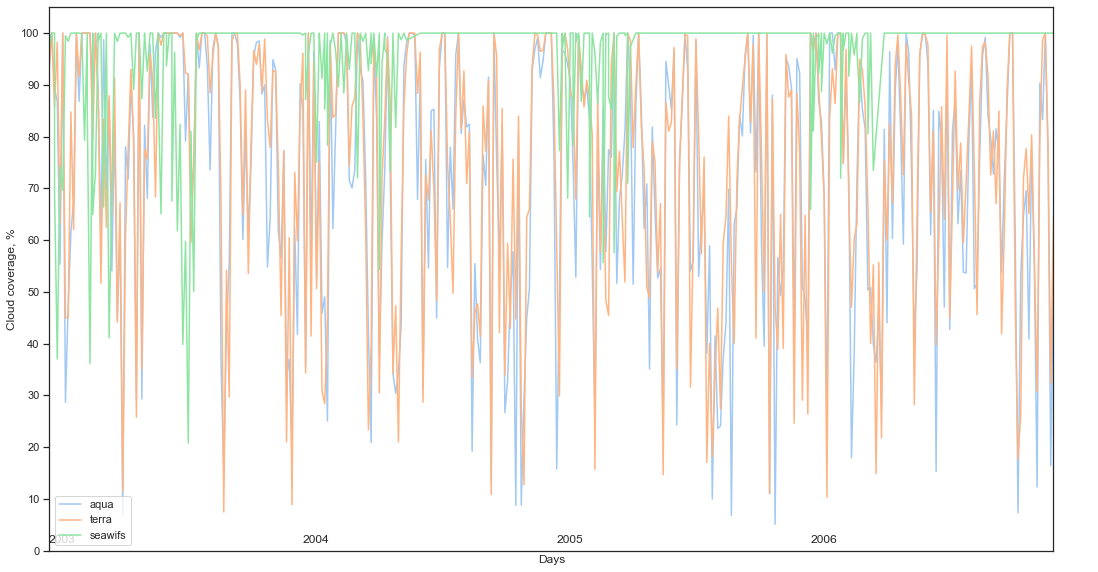

In [6]:
# Plot cloudcoverage/day
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot()

cloudcov_day = defaultdict(dict)
for satellite, tensors in satellite_tensors.items():
    x = []
    y = []

    for year, tensor in tensors.items():
        data = tensor['data']
        timeline = tensor['timeline'][0]
        
        for ind, day in enumerate(summer_days):
            try:
                x_value = np.where(timeline == day)[0][0] + year_day_extender[year]
                y_value = 100 * (1 - utils.calculate_fullness(data[:, :, ind], mask))
            except IndexError:
                x_value = ind + year_day_extender[year]
                y_value = 100

            x.append(x_value)
            y.append(y_value)
    
    z = list((zip(x, y)))
    z.sort(key=lambda z: z[0])
    z = np.array(z)
    cloudcov_day[satellite]['day'] = z[:, 0]
    cloudcov_day[satellite]['cloudcov'] = z[:, 1]
    plt.plot(z[:, 0], z[:, 1], label=satellite)
    
ax.set_xlabel('Days')
ax.set_ylabel('Cloud coverage, %')
ax.set_xlim([0, 92 * 4])
ax.set_ylim([0, 105])
ax.set_xticks([])
ax.tick_params(axis='x', rotation=90)
ax.set_yticks(np.arange(0, 110, 10))

# Year annotations
ax.annotate('2003', xy=(0, 2), xytext=(0, 1.5))
ax.annotate('2004', xy=(93, 2), xytext=(93, 1.5))
ax.annotate('2005', xy=(93*2, 2), xytext=(93*2, 1.5))
ax.annotate('2006', xy=(93*3, 2), xytext=(93*3, 1.5))
ax.annotate('2007', xy=(93*4, 2), xytext=(93*4, 1.5))

plt.legend(loc='best')

In [7]:
# Calculate aqua coverage
aqua_2003_mean_cloud_cov = cloudcov_day['aqua']['cloudcov'][0:93].mean()
aqua_2004_mean_cloud_cov = cloudcov_day['aqua']['cloudcov'][93:186].mean()
aqua_2005_mean_cloud_cov = cloudcov_day['aqua']['cloudcov'][186:279].mean()
aqua_2006_mean_cloud_cov = cloudcov_day['aqua']['cloudcov'][279:372].mean()

# Calculate terra coverage
terra_2003_mean_cloud_cov = cloudcov_day['terra']['cloudcov'][0:93].mean()
terra_2004_mean_cloud_cov = cloudcov_day['terra']['cloudcov'][93:186].mean()
terra_2005_mean_cloud_cov = cloudcov_day['terra']['cloudcov'][186:279].mean()
terra_2006_mean_cloud_cov = cloudcov_day['terra']['cloudcov'][279:372].mean()

# Calculate seawifs coverage
seawifs_2003_mean_cloud_cov = cloudcov_day['seawifs']['cloudcov'][0:93].mean()
seawifs_2004_mean_cloud_cov = cloudcov_day['seawifs']['cloudcov'][93:186].mean()
seawifs_2005_mean_cloud_cov = cloudcov_day['seawifs']['cloudcov'][186:279].mean()
seawifs_2006_mean_cloud_cov = cloudcov_day['seawifs']['cloudcov'][279:372].mean()

df = pd.DataFrame(
    [
        [
            aqua_2003_mean_cloud_cov,
            terra_2003_mean_cloud_cov,
            seawifs_2003_mean_cloud_cov
        ],
        [
            aqua_2004_mean_cloud_cov,
            terra_2004_mean_cloud_cov,
            seawifs_2004_mean_cloud_cov
        ],
        [
            aqua_2005_mean_cloud_cov,
            terra_2005_mean_cloud_cov,
            seawifs_2005_mean_cloud_cov
        ],
        [
            aqua_2006_mean_cloud_cov,
            terra_2006_mean_cloud_cov,
            seawifs_2006_mean_cloud_cov
        ]
    ], 
    index=['2003', '2004', '2005', '2006'], columns=['aqua', 'terra', 'seawifs']
)

print('Mean cloud coverage, %')
df

Mean cloud coverage, %


,aqua,terra,seawifs
2003,78.581969,79.923396,90.456734
2004,70.687240,73.215222,96.991915
2005,67.835032,69.451348,96.822110
2006,71.398161,73.496347,97.987427


In [8]:
lons = np.load('Input/static_grid/lons.npy')
lats = np.load('Input/static_grid/lats.npy')
lon_mean, lat_mean = lons.mean(), lats.mean()

In [9]:
def form_coverage(satellite, year):
    tensor = satellite_tensors[satellite][year]['data']
    cov = np.zeros_like(lats, dtype=np.float32)
    cov[mask == False] = np.nan
    for i in range(lats.shape[0]):
        for j in range(lats.shape[1]):
            if mask[i, j]:
                one_value_mask = np.zeros_like(lats, dtype=bool)
                one_value_mask[i, j] = True
                cum = 0
                for ind in range(tensor.shape[2]):
                    d = tensor[:, :, ind]
                    # +1 if some value, +0 otherwise
                    cum += 0 if np.isnan(d[one_value_mask]) else 1
                cov[i, j] = (1 - cum / 92) * 100  
    return cov

In [10]:
# Calculate cov_heatmaps (heavy!!!)
cov_heatmaps = defaultdict(list)
for row, satellite in tqdm(enumerate(['aqua', 'terra', 'seawifs']), total=3):
    for col, year in tqdm(enumerate(['2003', '2004', '2005', '2006']), total=4):
        cov = form_coverage(satellite, year)
        cov_heatmaps[satellite].append(cov)

In [11]:
# Calculate vmin of cov_heatmaps
vmin = 110
vmax = -10
for satellite in ['aqua', 'terra', 'seawifs']:
    for i, _ in enumerate(['2003', '2004', '2005', '2006']):
        d = cov_heatmaps[satellite][i]
        possible_vmin = d[~np.isnan(d)].min()
        if possible_vmin < vmin:
            vmin = possible_vmin
        possible_vmax = d[~np.isnan(d)].max()
        if possible_vmax > vmax:
            vmax = possible_vmax
            
norm = Normalize(vmin=vmin, vmax=vmax)
vmin, vmax

(47.826088, 100.0)

/Users/leonidkulikov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
/Users/leonidkulikov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()


Text(0.5, 0, 'Cloud coverage, %')

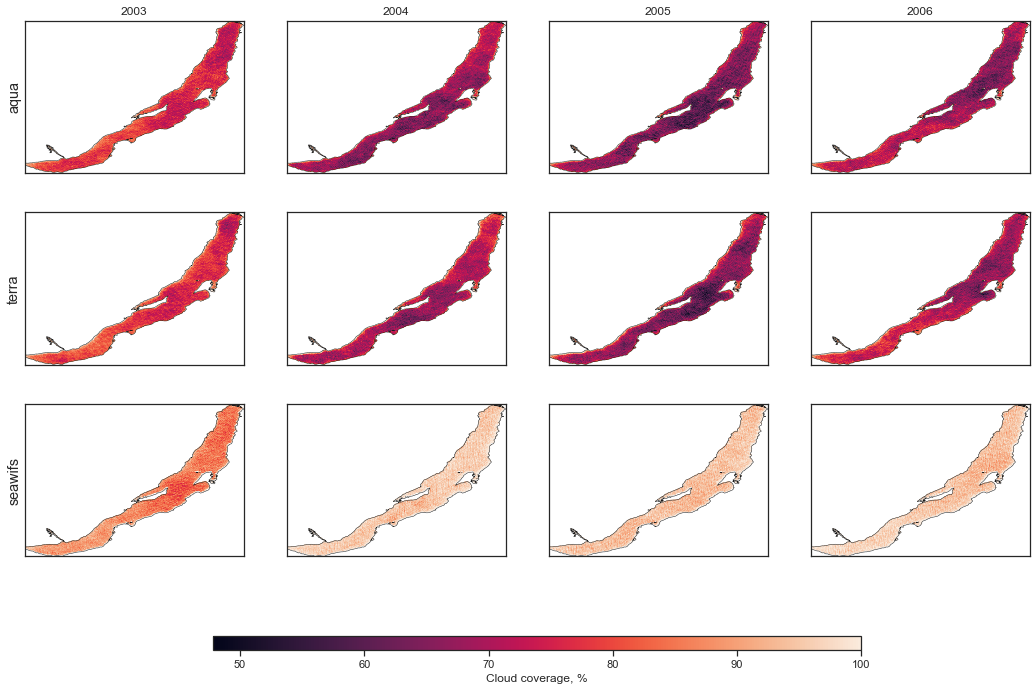

In [12]:
fig = plt.figure(figsize=(18, 10))
ax_lst = fig.subplots(3, 4)
shapefile_path = 'shapes/baikal/baikal'

ax_lst[0, 0].set_title('2003')
ax_lst[0, 1].set_title('2004')
ax_lst[0, 2].set_title('2005')
ax_lst[0, 3].set_title('2006')
for row, satellite in enumerate(['aqua', 'terra', 'seawifs']):
    cov_tensors = cov_heatmaps[satellite]
    ax_lst[row, 0].set_ylabel(satellite, rotation=90, size='large')
    for col, cov_tensor in enumerate(cov_tensors):
        basemap = Basemap(projection='cyl', resolution='i',
                          llcrnrlon=lons.min(), llcrnrlat=lats.min(), urcrnrlon=lons.max(), urcrnrlat=lats.max(),
                          lon_0=lon_mean, lat_0=lat_mean, ax=ax_lst[row, col])
        basemap.readshapefile(shapefile_path, name=shapefile_path)
        basemap.imshow(cov_tensor, vmin=vmin, vmax=vmax, origin='upper')

cax = fig.add_axes([0.27, 0.0, 0.5, 0.02]) # posititon
cb = ColorbarBase(cax, norm=norm, orientation='horizontal')
cb.ax.set_xlabel('Cloud coverage, %')

In [13]:
# Form dataframe with coverage data
coverage_df = pd.DataFrame(
    {
        'cloud coverage, %': np.concatenate(
            [
                np.array(cov_heatmaps['aqua']).flatten(),
                np.array(cov_heatmaps['terra']).flatten(),
                np.array(cov_heatmaps['seawifs']).flatten()
            ]
        ),
        'satellite': [s 
                      for s in ['aqua', 'terra', 'seawifs'] 
                      for _ in ['2003', '2004', '2005', '2006'] 
                      for _ in lons.flatten()],
        'year': [year 
                 for _ in ['aqua', 'terra', 'seawifs'] 
                 for year in ['2003', '2004', '2005', '2006']
                 for _ in lons.flatten()]
    }
)

coverage_df.dropna(inplace=True)
coverage_df.reset_index(inplace=True, drop=True)
coverage_df.head()

,"cloud coverage, %",satellite,year
0,100.000000,aqua,2003
1,95.652176,aqua,2003
2,98.913040,aqua,2003
3,92.391304,aqua,2003
4,84.782608,aqua,2003


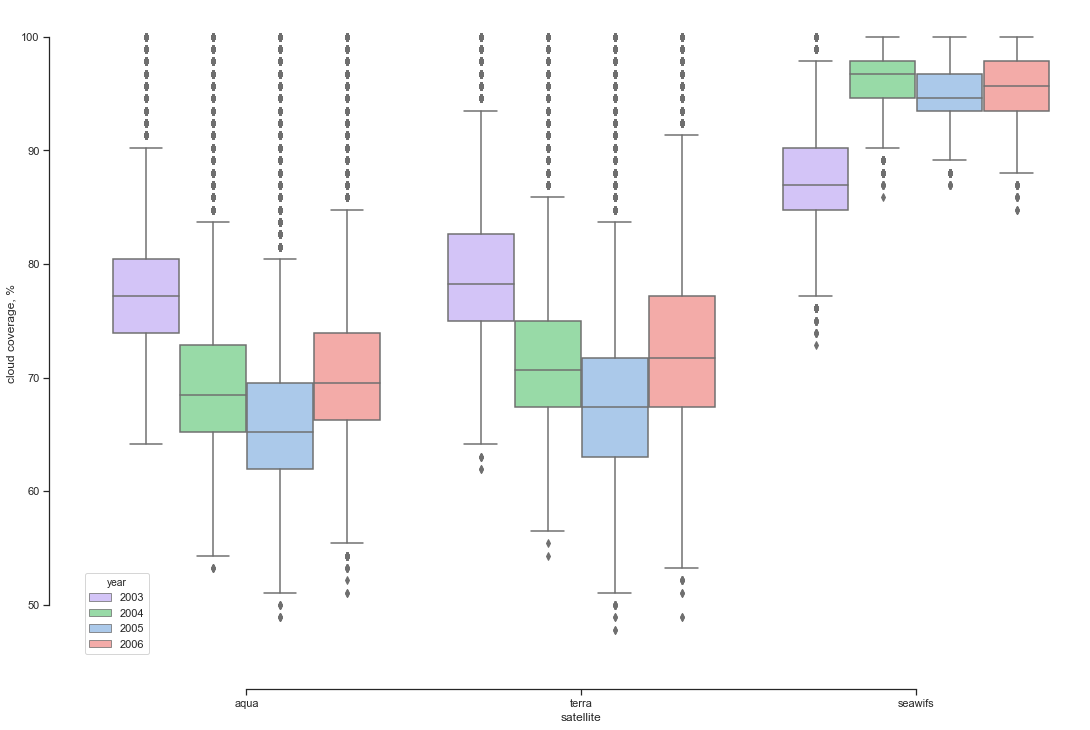

In [14]:
# Draw boxplots for satellite coverage
sns.boxplot(x="satellite", y="cloud coverage, %",
            hue="year", palette=["m", "g", "b", "r"],
            data=coverage_df)
sns.despine(offset=30, trim=True)

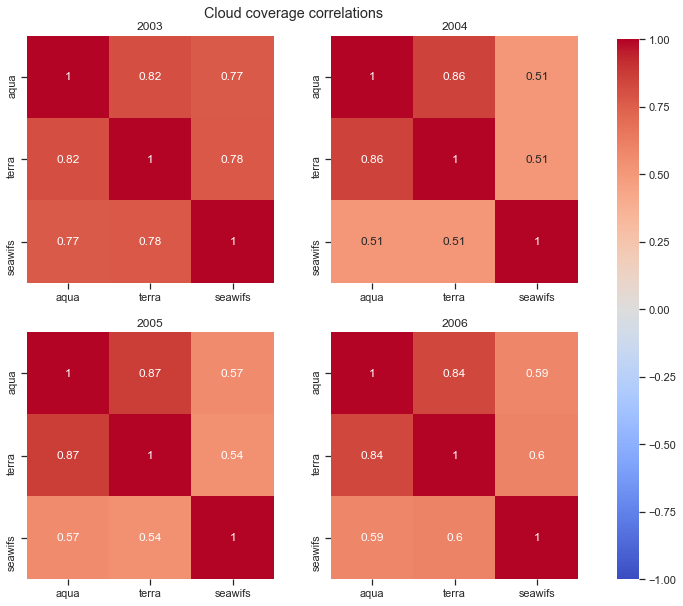

In [15]:
# Plot coverage correlations

fig = plt.figure(figsize=(10, 10))
fig.suptitle('Cloud coverage correlations', y=.92)
ax_lst = fig.subplots(2, 2)
cbar_ax = fig.add_axes([.95, .125, .03, .75])

for i, year in enumerate(['2003', '2004', '2005', '2006']):
    satellite_coverage_df = pd.DataFrame(
        {
            'aqua': cov_heatmaps['aqua'][i].flatten(),
            'terra': cov_heatmaps['terra'][i].flatten(),
            'seawifs': cov_heatmaps['seawifs'][i].flatten()
        }
    )
    satellite_coverage_df.dropna(inplace=True)
    satellite_coverage_df.reset_index(inplace=True, drop=True)

    sns.heatmap(
        satellite_coverage_df.corr(), 
        vmin=-1, vmax=1, center=0,
        cmap='coolwarm',
        square=True,
        annot=True,
        ax=ax_lst[i // 2, i % 2],
        cbar_ax=cbar_ax
    ).set_title(f'{year}')

In [16]:
def calculate_filled_count(satellite, year, day):
    tensor = satellite_tensors[satellite][year]['data']
    timeline = satellite_tensors[satellite][year]['timeline'][0]
    try:
        ind = np.where(timeline == day)[0][0]
    except IndexError:
        return 0
    X = tensor[:, :, ind][mask]
    return X[~np.isnan(X)].shape[0]

In [17]:
filled_count_df = pd.DataFrame(columns=['satellite', 'filled_count', 'year', 'day'])
for satellite in satellites:
    for year in years:
        for day in summer_days:
            filled_count = calculate_filled_count(satellite, year, day)
            filled_count_df = filled_count_df.append(
                {
                    'satellite': satellite,
                    'filled_count': filled_count,
                    'year': year,
                    'day': day
                }, ignore_index=True
            )
print('Maximum count: ', lats[mask].flatten().shape[0])
filled_count_df.head()

Maximum count:  31035


,satellite,filled_count,year,day
0,aqua,434,2003,151
1,aqua,0,2003,152
2,aqua,3341,2003,153
3,aqua,4108,2003,154
4,aqua,13859,2003,155


In [18]:
print(
    'FILLED COUNT MEAN',
    '\n',
    '\n2003'
    '\nAqua: ', filled_count_df[(filled_count_df['satellite'] == 'aqua') & (filled_count_df['year'] == '2003')]['filled_count'].mean(),
    '\nTerra: ', filled_count_df[(filled_count_df['satellite'] == 'terra') & (filled_count_df['year'] == '2003')]['filled_count'].mean(),
    '\nSeawifs: ', filled_count_df[(filled_count_df['satellite'] == 'seawifs') & (filled_count_df['year'] == '2003')]['filled_count'].mean(),
    '\n',
    '\n2004'
    '\nAqua: ', filled_count_df[(filled_count_df['satellite'] == 'aqua') & (filled_count_df['year'] == '2004')]['filled_count'].mean(),
    '\nTerra: ', filled_count_df[(filled_count_df['satellite'] == 'terra') & (filled_count_df['year'] == '2004')]['filled_count'].mean(),
    '\nSeawifs: ', filled_count_df[(filled_count_df['satellite'] == 'seawifs') & (filled_count_df['year'] == '2004')]['filled_count'].mean(),
    '\n',
    '\n2005'
    '\nAqua: ', filled_count_df[(filled_count_df['satellite'] == 'aqua') & (filled_count_df['year'] == '2005')]['filled_count'].mean(),
    '\nTerra: ', filled_count_df[(filled_count_df['satellite'] == 'terra') & (filled_count_df['year'] == '2005')]['filled_count'].mean(),
    '\nSeawifs: ', filled_count_df[(filled_count_df['satellite'] == 'seawifs') & (filled_count_df['year'] == '2005')]['filled_count'].mean(),
    '\n',
    '\n2006'
    '\nAqua: ', filled_count_df[(filled_count_df['satellite'] == 'aqua') & (filled_count_df['year'] == '2006')]['filled_count'].mean(),
    '\nTerra: ', filled_count_df[(filled_count_df['satellite'] == 'terra') & (filled_count_df['year'] == '2006')]['filled_count'].mean(),
    '\nSeawifs: ', filled_count_df[(filled_count_df['satellite'] == 'seawifs') & (filled_count_df['year'] == '2006')]['filled_count'].mean(),
    '\n',
)

FILLED COUNT MEAN 
 
2003
Aqua:  6647.086021505376 
Terra:  6230.774193548387 
Seawifs:  3815.569892473118 
 
2004
Aqua:  9097.21505376344 
Terra:  8312.655913978495 
Seawifs:  1151.3870967741937 
 
2005
Aqua:  9982.397849462366 
Terra:  9480.774193548386 
Seawifs:  1493.5806451612902 
 
2006
Aqua:  8876.58064516129 
Terra:  8225.408602150537 
Seawifs:  1336.6344086021506 



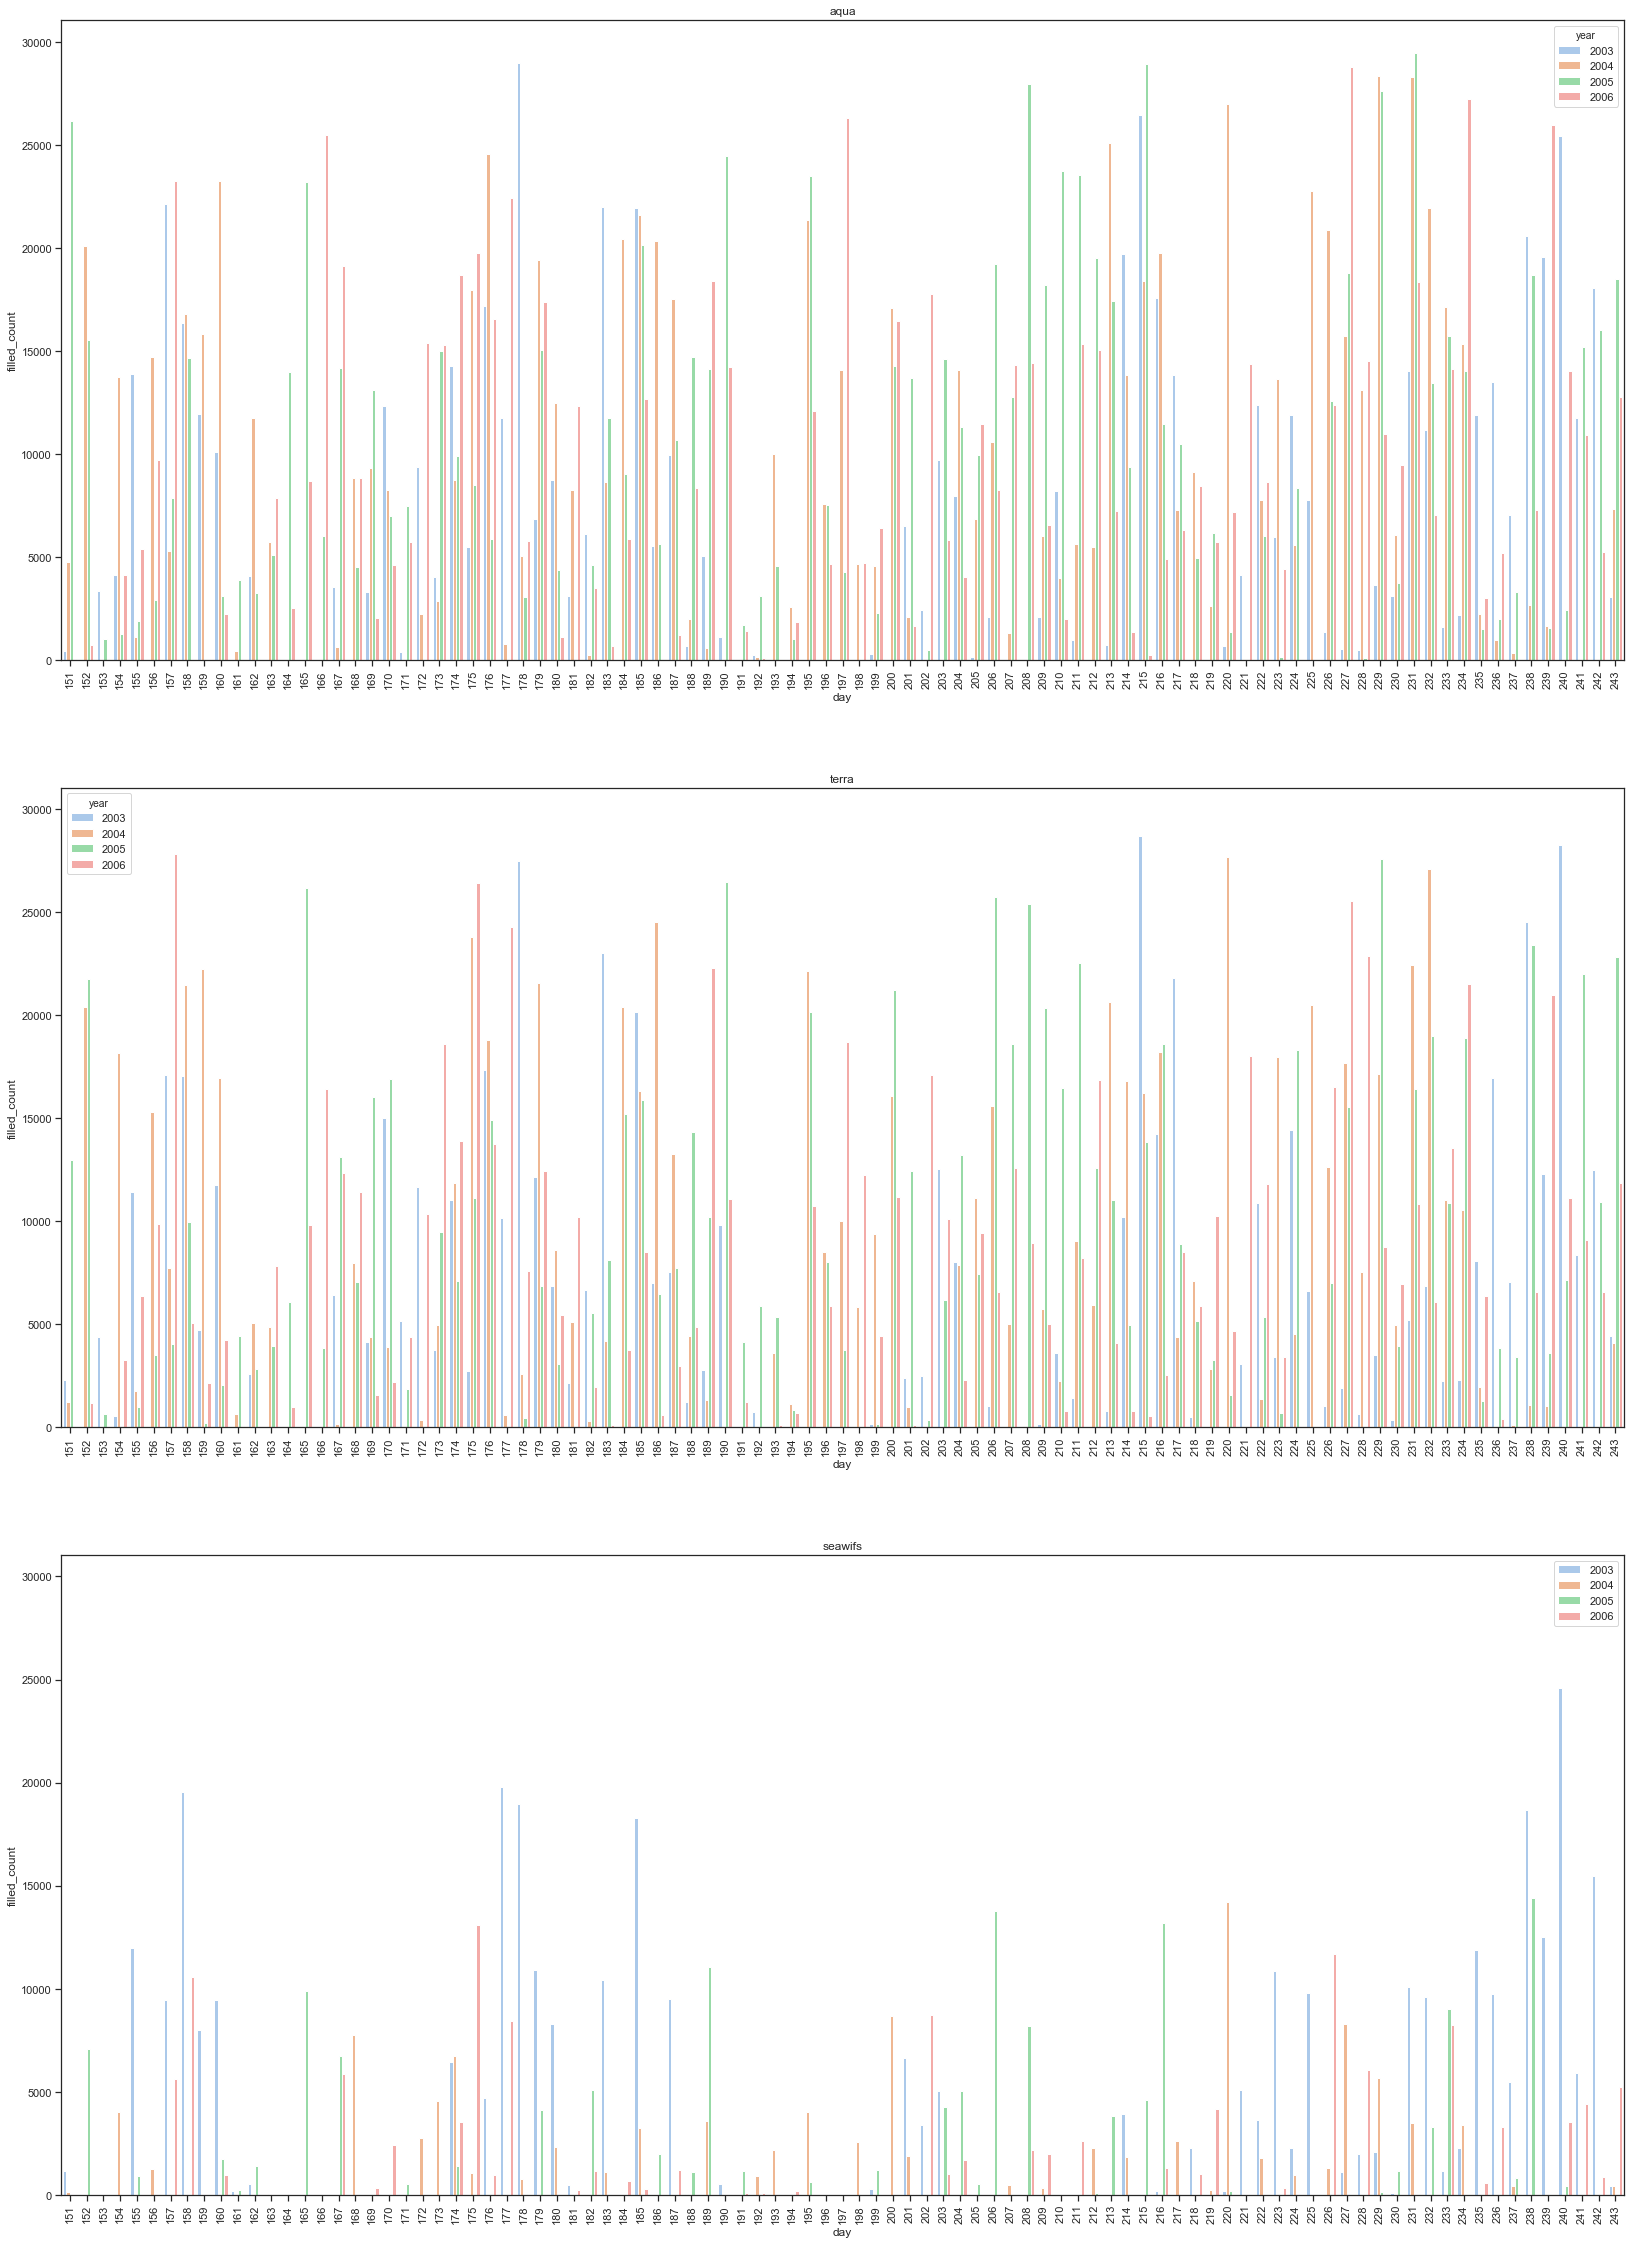

In [19]:
fig = plt.figure(figsize=(28, 40))
ax_lst = fig.subplots(3)

colors = ['g', 'r', 'm', 'b']
for i, satellite in enumerate(satellites):
    filled_count = filled_count_df[filled_count_df['satellite'] == satellite]
    sns.barplot(x="day", y="filled_count", hue="year", data=filled_count, ax=ax_lst[i])
    ax_lst[i].set_ylim([0, lats[mask].flatten().shape[0]])
    ax_lst[i].tick_params(axis='x', rotation=90)
    ax_lst[i].set_title(satellite)

plt.legend(loc='best')

In [20]:
def get_ind_from_timeline_by_day(timeline, day):
    try:
        ind = np.where(timeline == day)[0][0]
    except IndexError:
        ind = None
    return ind


def _get_diff_between_tensor_info_day(tensor1_info, tensor2_info, day):
    tensor1 = tensor1_info['data']
    tensor2 = tensor2_info['data']
    timeline1 = tensor1_info['timeline'][0]
    timeline2 = tensor2_info['timeline'][0]
    
    ind1 = get_ind_from_timeline_by_day(timeline1, day)
    ind2 = get_ind_from_timeline_by_day(timeline2, day)
    
    if (ind1 is None and ind2 is None) or (ind1 is None) or (ind2 is None):
        df = None
    else:
        d1 = tensor1[:, :, ind1]
        d2 = tensor2[:, :, ind2]
        diff_d = d1[mask] - d2[mask]
        df = pd.DataFrame({'diff': diff_d, 'day': [day for _ in range(len(diff_d))]})

    return df


def _get_diff_between_tensor_info(tensor1_info, tensor2_info):
    tensor1 = tensor1_info['data']
    tensor2 = tensor2_info['data']
    timeline1 = tensor1_info['timeline'][0]
    timeline2 = tensor2_info['timeline'][0]
    
    df = pd.DataFrame(columns=['diff', 'day'])
    for day in summer_days:
        diff_df = _get_diff_between_tensor_info_day(tensor1_info, tensor2_info, day)
        if diff_df is not None:
            df = df.append(diff_df)
            
    return df


def get_diff_between(satellite1, satellite2, year, day=None):
    tensor1_info = satellite_tensors[satellite1][year]
    tensor2_info = satellite_tensors[satellite2][year]
    
    if day is not None:
        df = _get_diff_between_tensor_info_day(tensor1_info, tensor2_info, day)
    else:
        df = _get_diff_between_tensor_info(tensor1_info, tensor2_info)
        
    return df

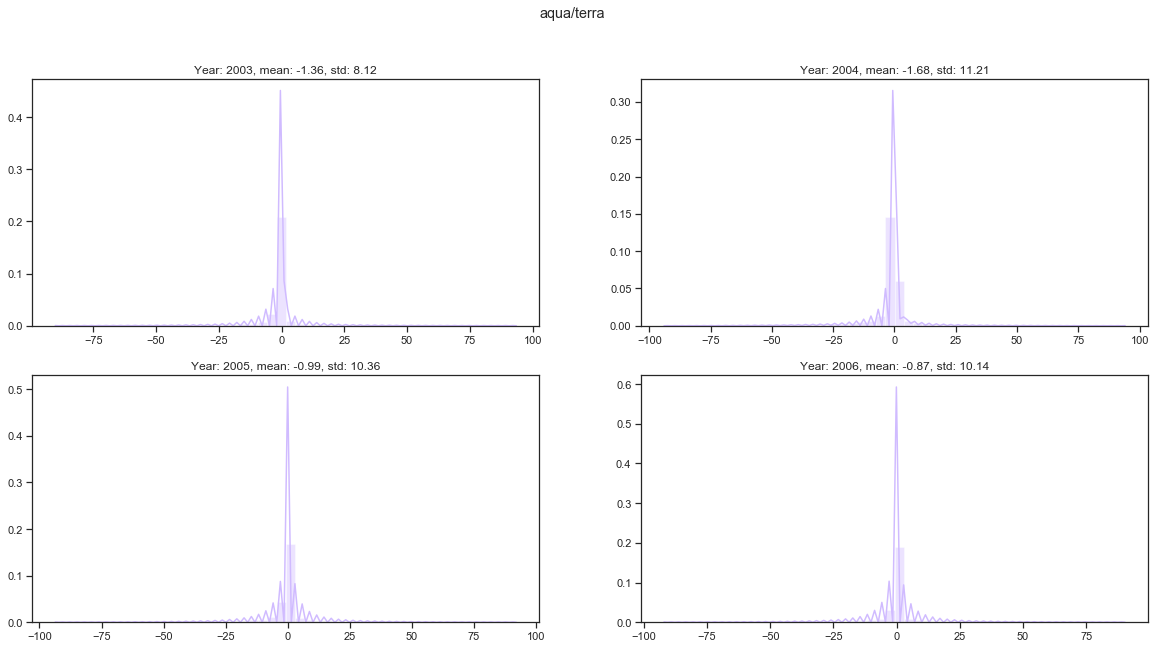

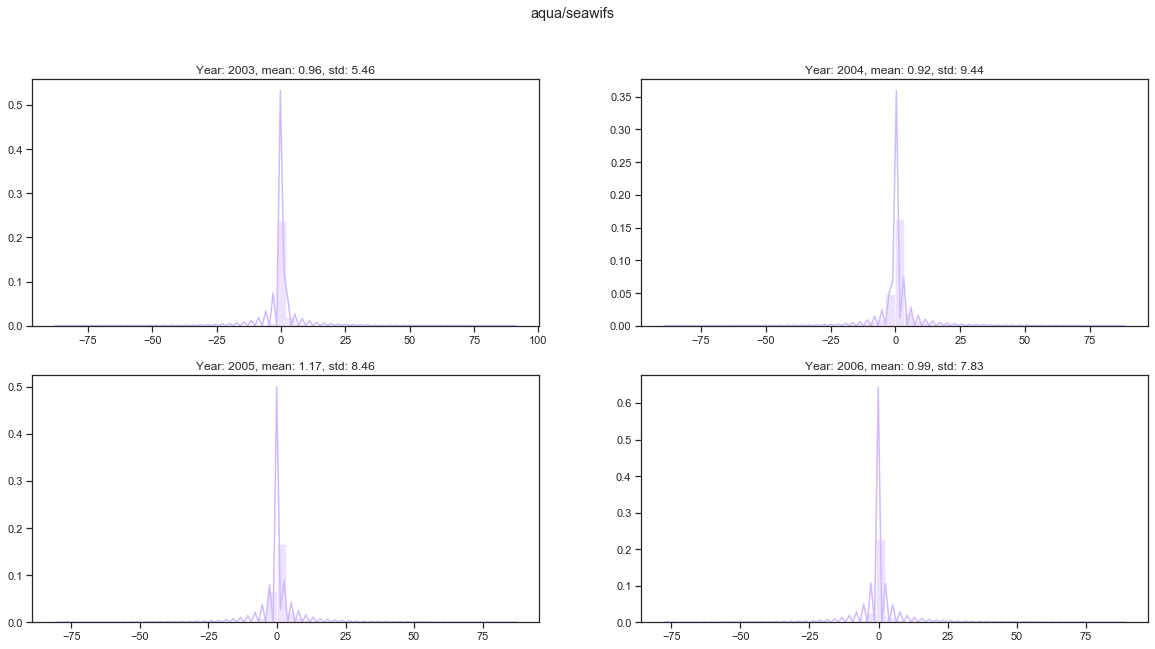

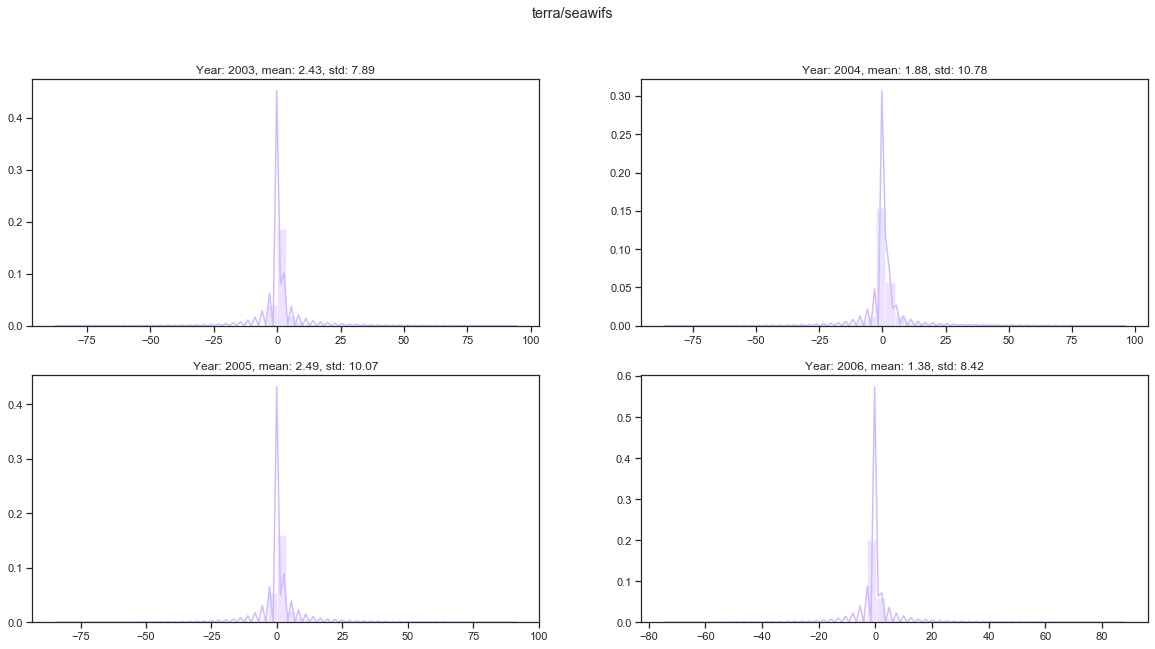

In [21]:
# Draw probaility density functions for diff of known values between satellites
satellite_pairs = [('aqua', 'terra'), ('aqua', 'seawifs'), ('terra', 'seawifs')]

for s1, s2 in satellite_pairs:
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle(f'{s1}/{s2}')
    ax_lst = fig.subplots(2, 2)
    
    for i, year in enumerate(years):
        diff_df = get_diff_between(s1, s2, year)
        diff_df = diff_df.dropna()
        diff_d = diff_df['diff'].to_numpy()
        ax = ax_lst[i // 2, i % 2]
        ax.set_title(f'Year: {year}, mean: {diff_d.mean():.2f}, std: {diff_d.std():.2f}')
        sns.distplot(diff_d, color="m", ax=ax)

In [22]:
def get_decile_num(val, deciles):
    for i, decile in enumerate(deciles, 1):
        if val <= decile:
            return decile
    return deciles[-1]

def get_quantile_num(val, quantiles):
    for i, quantile in enumerate(quantiles, 1):
        if val <= quantile:
            return quantile
    return quantiles[-1]

In [23]:
diff_df = pd.DataFrame(columns=['diff', 'day', 'year', 'satellite_pair'])
for s1, s2 in satellite_pairs:    
    for i, year in enumerate(years):
        df = get_diff_between(s1, s2, year)
        df = df.dropna()
        
        diff_df = diff_df.append(
            pd.DataFrame(
                {
                    'diff': df['diff'],
                    'day': df['day'],
                    'year': [year for _ in range(df['diff'].size)],
                    'satellite_pair': [f'{s1}/{s2}' for _ in range(df['diff'].size)]
                }
            )
        )
        
deciles = np.percentile(diff_df['diff'], np.arange(10, 110, 10))
quantiles = np.percentile(diff_df['diff'], np.arange(25, 125, 25))
diff_df['decile'] = [get_decile_num(diff, deciles) for diff in diff_df['diff']]
diff_df['quantile'] = [get_quantile_num(diff, quantiles) for diff in diff_df['diff']]
diff_df.head()

,diff,day,year,satellite_pair,decile,quantile
6785,12.400533,151,2003,aqua/terra,95.42512,95.42512
6787,3.152271,151,2003,aqua/terra,95.42512,95.42512
6847,13.089846,151,2003,aqua/terra,95.42512,95.42512
6849,4.675302,151,2003,aqua/terra,95.42512,95.42512
6908,11.382684,151,2003,aqua/terra,95.42512,95.42512


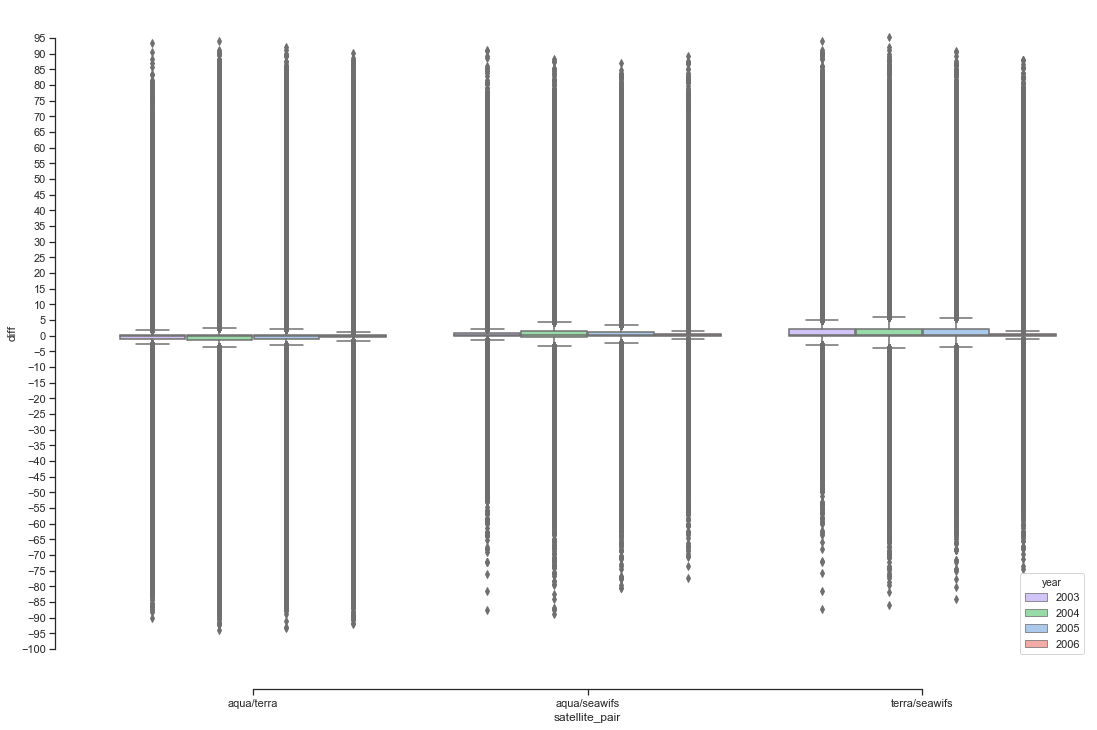

In [24]:
sns.boxplot(x="satellite_pair", y="diff", hue="year", palette=["m", "g", "b", "r"], data=diff_df)
plt.yticks(np.arange(-100, 100, 5))
sns.despine(offset=30, trim=True)

In [45]:
# Find p-values for diff
from scipy.stats import ttest_1samp

satellite_pairs = [('aqua', 'terra'), ('aqua', 'seawifs'), ('terra', 'seawifs')]

for s1, s2 in satellite_pairs:
    for year in years:
        df = diff_df[(diff_df['satellite_pair'] == f'{s1}/{s2}') & (diff_df['year'] == year)]
        d = df['diff'].to_numpy()
        pvalue = ttest_1samp(d, 0).pvalue
        print(f'{s1}/{s2} {year}: pvalue = {pvalue}')

aqua/terra 2003: pvalue = 0.0
aqua/terra 2004: pvalue = 0.0
aqua/terra 2005: pvalue = 0.0
aqua/terra 2006: pvalue = 0.0
aqua/seawifs 2003: pvalue = 0.0
aqua/seawifs 2004: pvalue = 1.8586485717865117e-158
aqua/seawifs 2005: pvalue = 0.0
aqua/seawifs 2006: pvalue = 2.7080603559835377e-279
terra/seawifs 2003: pvalue = 0.0
terra/seawifs 2004: pvalue = 0.0
terra/seawifs 2005: pvalue = 0.0
terra/seawifs 2006: pvalue = 0.0


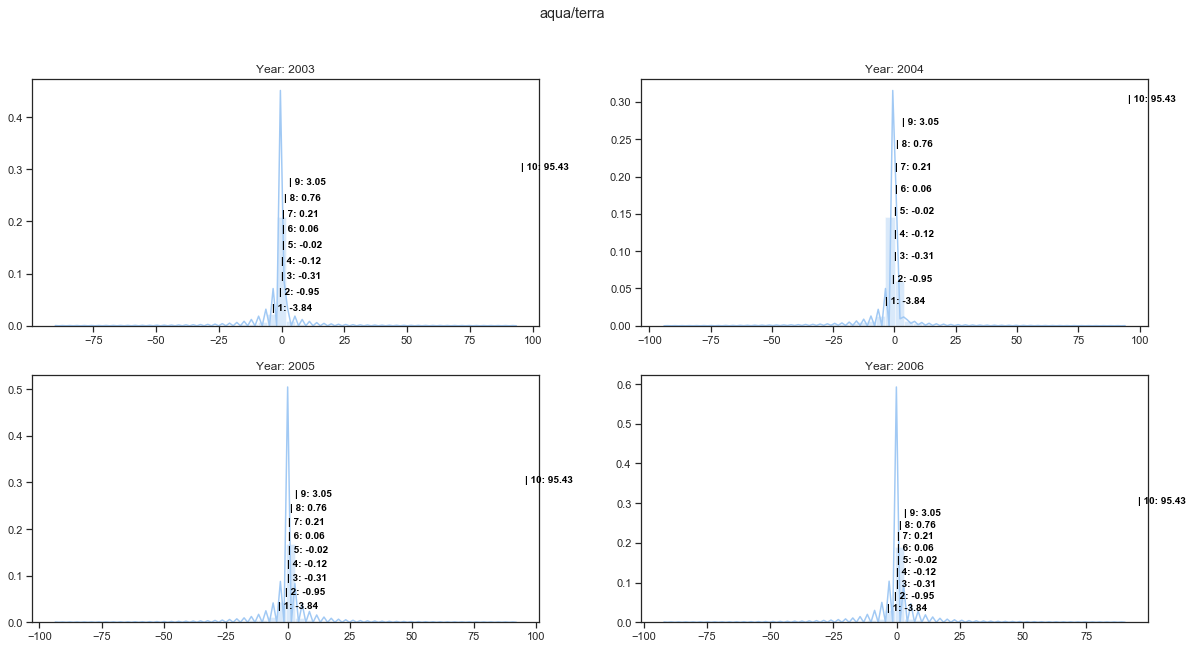

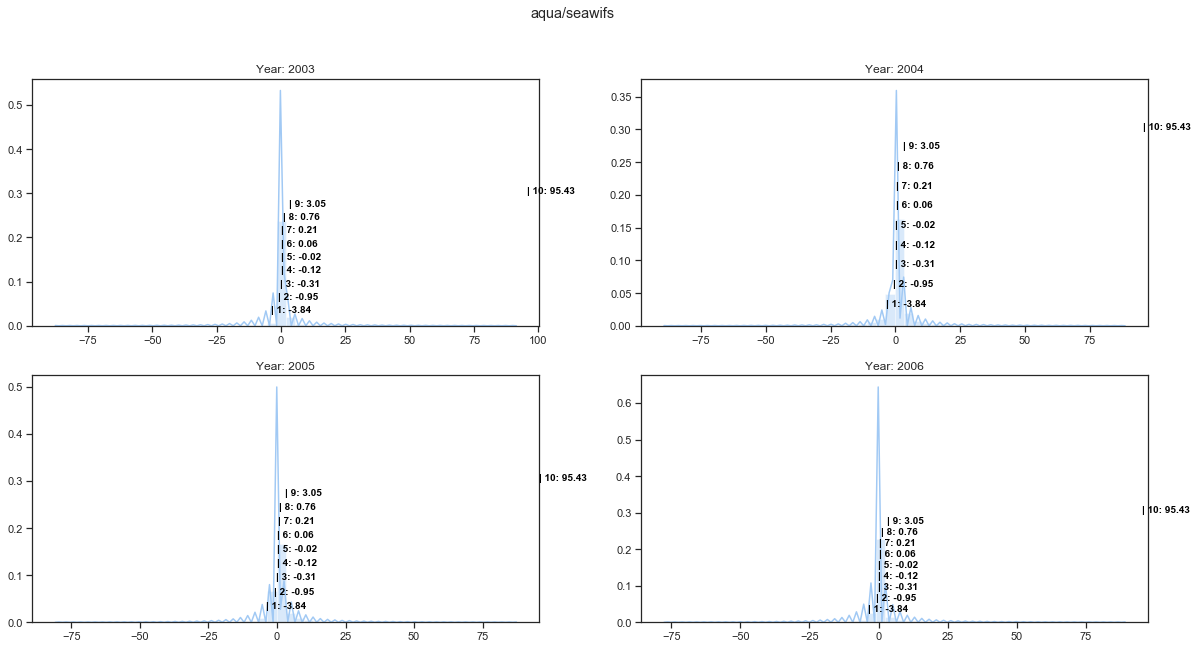

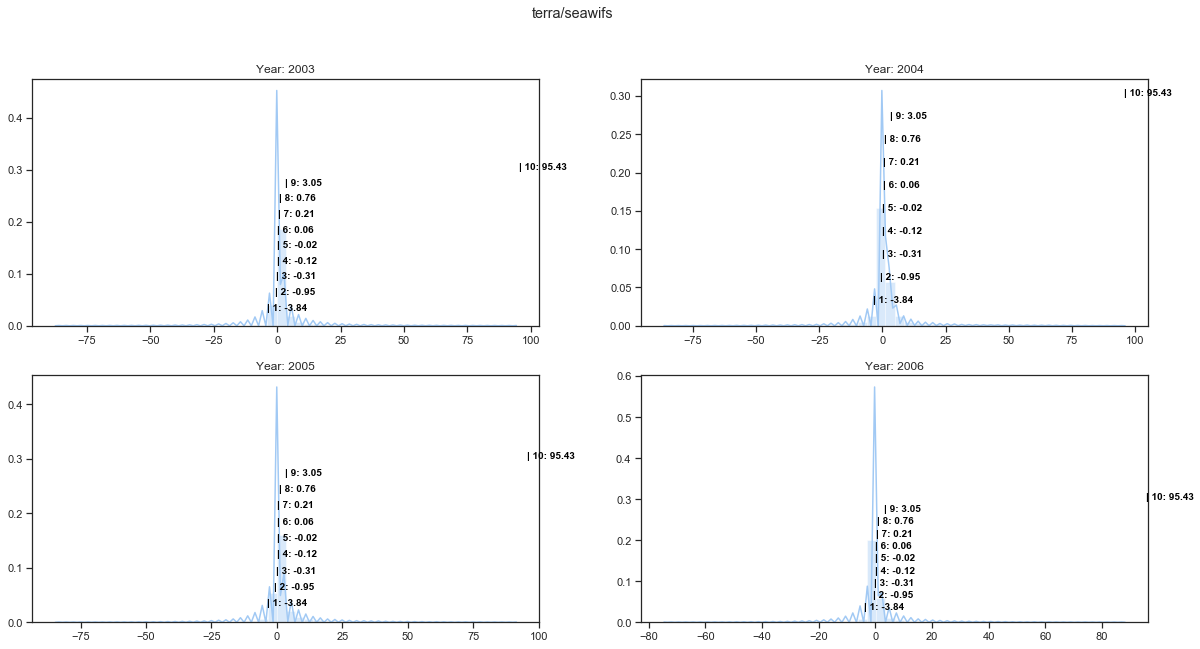

In [25]:
# Draw probaility density functions for diff of known values between satellites with deciles
satellite_pairs = [('aqua', 'terra'), ('aqua', 'seawifs'), ('terra', 'seawifs')]

for s1, s2 in satellite_pairs:
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle(f'{s1}/{s2}')
    ax_lst = fig.subplots(2, 2)
    
    for i, year in enumerate(years):
        df = diff_df[(diff_df['satellite_pair'] == f'{s1}/{s2}') & (diff_df['year'] == year)]
        d = df['diff'].to_numpy()
        ax = ax_lst[i // 2, i % 2]
        ax.set_title(f'Year: {year}')
        decile_plot = sns.distplot(d, color="b", ax=ax)
        for i, dec in enumerate(deciles, 1):
            decile_plot.text(
                dec, 0.03 * i, 
                f"| {i}: {dec:.02f}", 
                horizontalalignment='left', size='small', color='black', weight='semibold'
            )

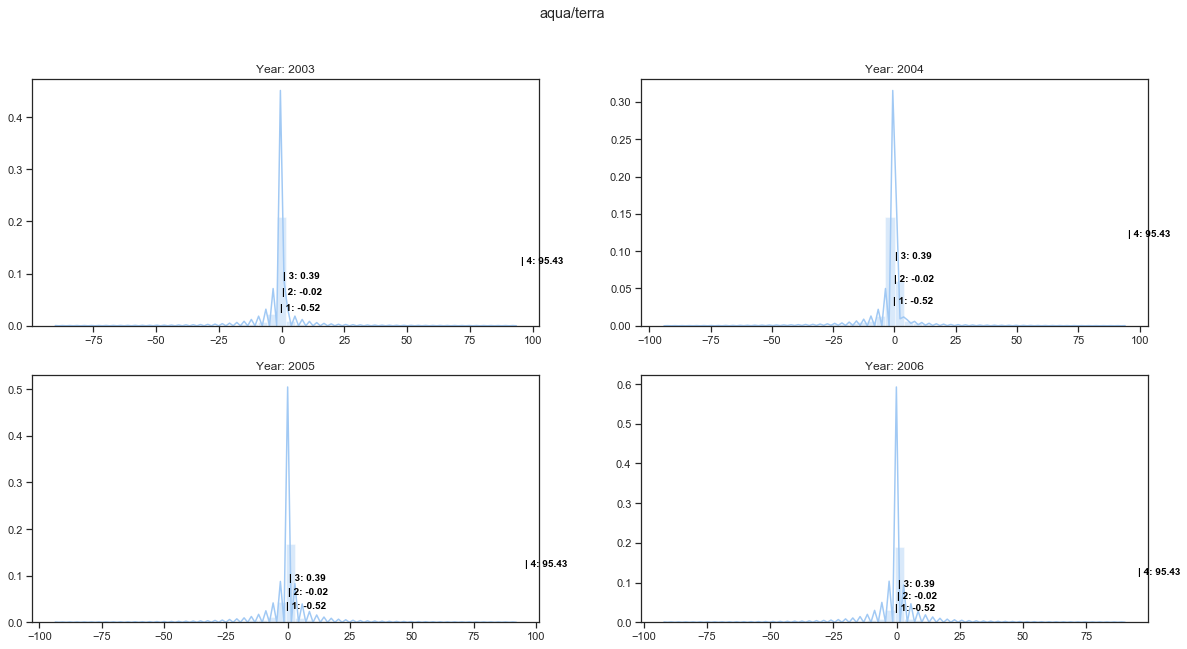

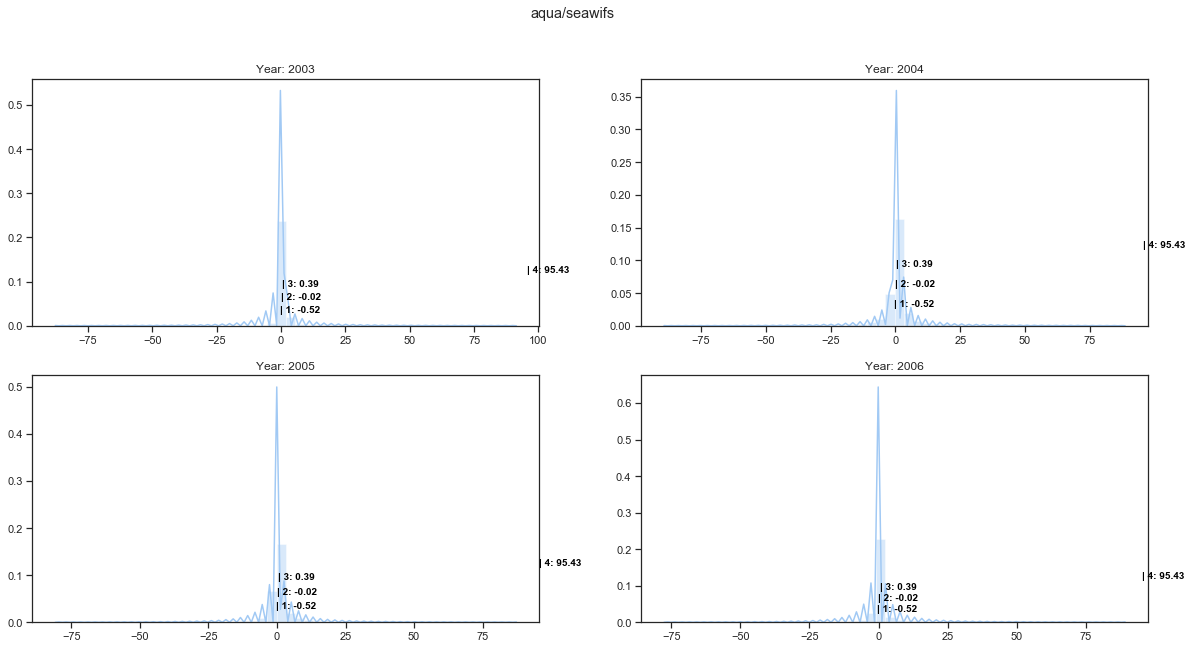

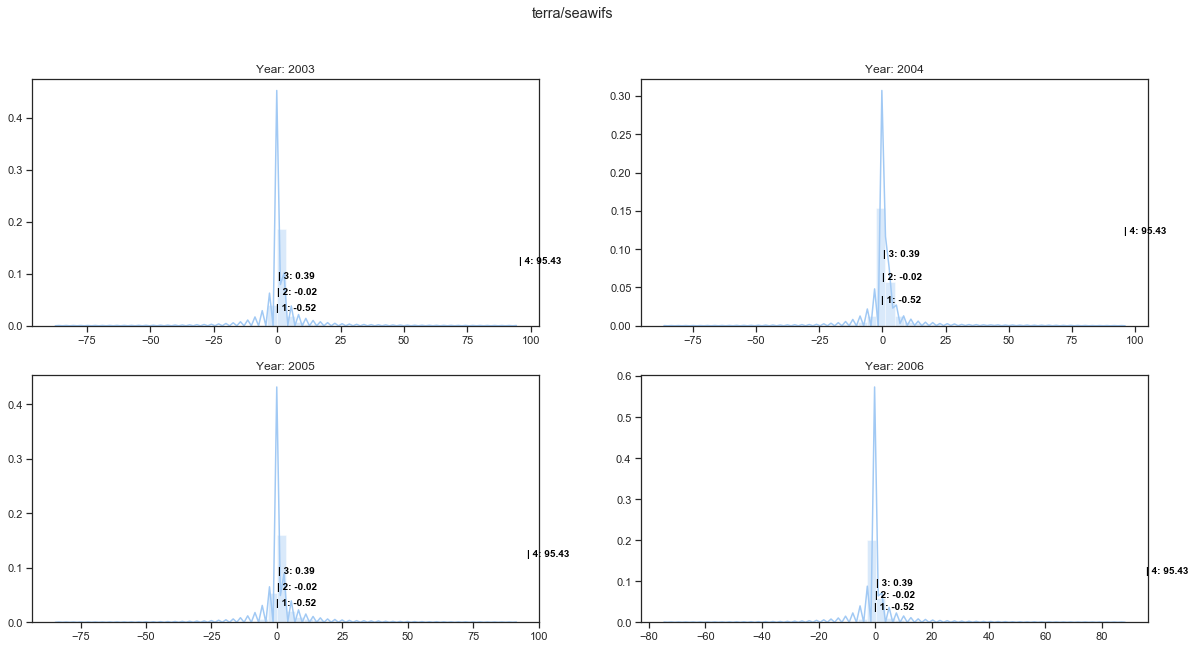

In [26]:
# Draw probaility density functions for diff of known values between satellites with quantiles
satellite_pairs = [('aqua', 'terra'), ('aqua', 'seawifs'), ('terra', 'seawifs')]

for s1, s2 in satellite_pairs:
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle(f'{s1}/{s2}')
    ax_lst = fig.subplots(2, 2)
    
    for i, year in enumerate(years):
        df = diff_df[(diff_df['satellite_pair'] == f'{s1}/{s2}') & (diff_df['year'] == year)]
        d = df['diff'].to_numpy()
        ax = ax_lst[i // 2, i % 2]
        ax.set_title(f'Year: {year}')
        quantile_plot = sns.distplot(d, color="b", ax=ax)
        for i, quant in enumerate(quantiles, 1):
            quantile_plot.text(
                quant, 0.03 * i, 
                f"| {i}: {quant:.02f}", 
                horizontalalignment='left', size='small', color='black', weight='semibold'
            )